<a href="https://colab.research.google.com/github/TruongQuocHau110802/AI-subject/blob/main/AI_20_09_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 15.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=6c0b93f9334fe673dcb1de0a215bc58cc049de55ad7c64c7ab059244ed4d3b67
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(11)
mfx = fuzz.trimf(x,[0,5,10])
#plt.plot(x,mfx)
#plt.show()
x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

21.666666666666668


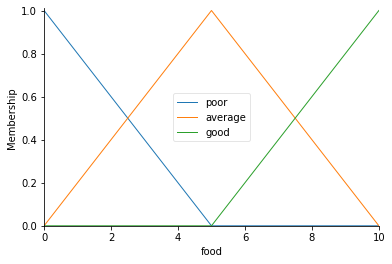

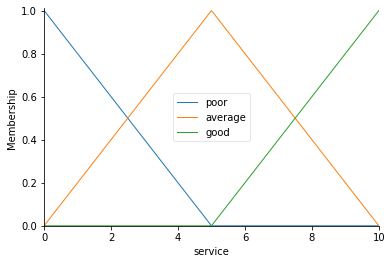

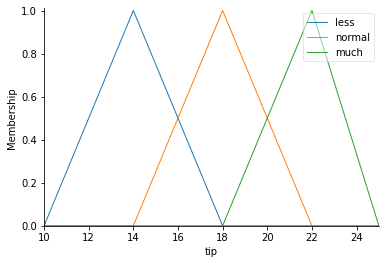

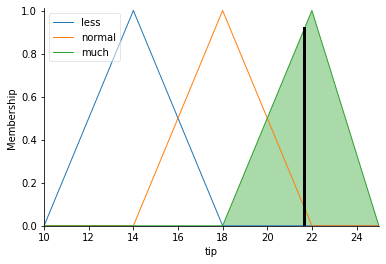

In [ ]:
#Antecedent: dau vao
#Consequent: ket qua

from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,26,1),'tip')
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
tip['less'] = fuzz.trimf(tip.universe,[10,14,18])
tip['normal'] = fuzz.trimf(tip.universe,[14,18,22])
tip['much'] = fuzz.trimf(tip.universe,[18,22,25])
food.view()
service.view()
tip.view()
#food['average'].view()
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['less'])
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['normal'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['normal'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 10
tipping.input['service'] = 10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

18.333333333333325


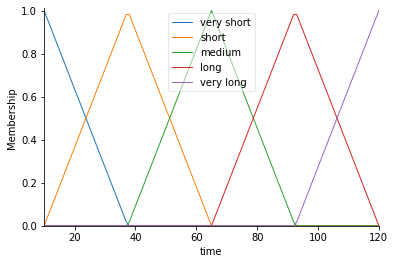

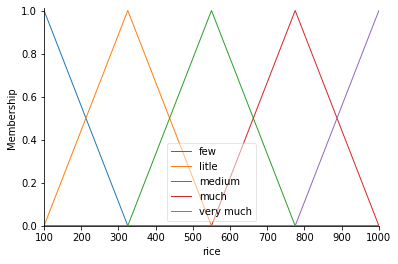

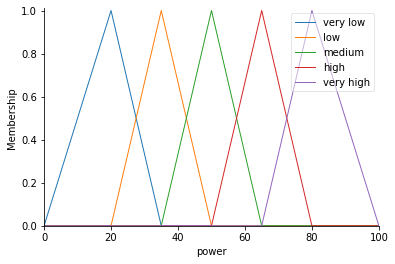

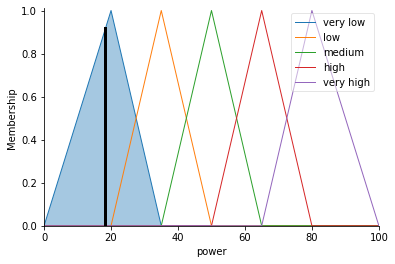

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,121,1),'time')
rice = ctrl.Antecedent(np.arange(100,1001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')
time['very short'] = fuzz.trimf(time.universe,[10,10,37.5])
time['short'] = fuzz.trimf(time.universe,[10,37.5,65])
time['medium'] = fuzz.trimf(time.universe,[37.5,65,92.5])
time['long'] = fuzz.trimf(time.universe,[65,92.5,120])
time['very long'] = fuzz.trimf(time.universe,[92.5,120,120])
rice['few'] = fuzz.trimf(rice.universe,[100,100,325])
rice['litle'] = fuzz.trimf(rice.universe,[100,325,550])
rice['medium'] = fuzz.trimf(rice.universe,[325,550,775])
rice['much'] = fuzz.trimf(rice.universe,[550,775,1000])
rice['very much'] = fuzz.trimf(rice.universe,[775,1000,1000])
power['very low'] = fuzz.trimf(power.universe,[0,20,35])
power['low'] = fuzz.trimf(power.universe,[20,35,50])
power['medium'] = fuzz.trimf(power.universe,[35,50,65])
power['high'] = fuzz.trimf(power.universe,[50,65,80])
power['very high'] = fuzz.trimf(power.universe,[65,80,100])
time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['very short']&rice['few'],power['very low'])
rule2 = ctrl.Rule(time['very short']&rice['litle'],power['low'])
rule3 = ctrl.Rule(time['very short']&rice['medium'],power['medium'])
rule4 = ctrl.Rule(time['very short']&rice['much'],power['high'])
rule5 = ctrl.Rule(time['very short']&rice['very much'],power['very high'])
rule6 = ctrl.Rule(time['short']&rice['few'],power['low'])
rule7 = ctrl.Rule(time['short']&rice['litle'],power['low'])
rule8 = ctrl.Rule(time['short']&rice['medium'],power['medium'])
rule9 = ctrl.Rule(time['short']&rice['much'],power['high'])
rule10 = ctrl.Rule(time['short']&rice['very much'],power['high'])
rule11 = ctrl.Rule(time['medium']&rice['few'],power['medium'])
rule12 = ctrl.Rule(time['medium']&rice['litle'],power['medium'])
rule13 = ctrl.Rule(time['medium']&rice['medium'],power['medium'])
rule14 = ctrl.Rule(time['medium']&rice['much'],power['high'])
rule15 = ctrl.Rule(time['medium']&rice['very much'],power['high'])
rule16 = ctrl.Rule(time['long']&rice['few'],power['low'])
rule17 = ctrl.Rule(time['long']&rice['litle'],power['medium'])
rule18 = ctrl.Rule(time['long']&rice['medium'],power['high'])
rule19 = ctrl.Rule(time['long']&rice['much'],power['high'])
rule20 = ctrl.Rule(time['long']&rice['very much'],power['very high'])
rule21 = ctrl.Rule(time['very long']&rice['few'],power['very low'])
rule22 = ctrl.Rule(time['very long']&rice['litle'],power['low'])
rule23 = ctrl.Rule(time['very long']&rice['medium'],power['high'])
rule24 = ctrl.Rule(time['very long']&rice['much'],power['very high'])
rule25 = ctrl.Rule(time['very long']&rice['very much'],power['very high'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                    rule8,rule9,rule10,rule11,rule12,rule13,rule14,
                                    rule15,rule16,rule17,rule18,rule19,rule20,rule21,
                                    rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['rice'] = 100
powering.input['time'] = 10
powering.compute()
print(powering.output['power'])
power.view(sim = powering)


82.38095238095238


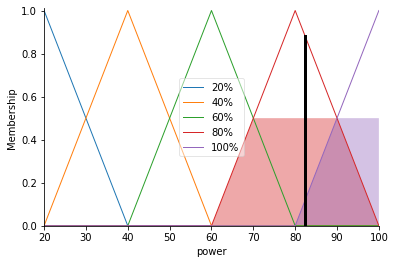

In [ ]:
from numpy.ma.extras import average
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time=ctrl.Antecedent(np.arange(10,60,1),'time')
rice=ctrl.Antecedent(np.arange(100,1001,1),'rice')
power=ctrl.Consequent(np.arange(20,101,1),'power')
time['nhanh']=fuzz.trimf(time.universe,[10,10,30])
time['trung binh']=fuzz.trimf(time.universe,[10,30,60])
time['cham']=fuzz.trimf(time.universe,[30,60,60])
rice['Rat it']=fuzz.trimf(rice.universe,[100,100,300])
rice['It']=fuzz.trimf(rice.universe,[100,300,500])
rice['Trung binh']=fuzz.trimf(rice.universe,[300,500,700])
rice['Nhieu']=fuzz.trimf(rice.universe,[500,700,1000])
rice['Rat nhieu']=fuzz.trimf(rice.universe,[700,1000,1000])
power['20%']=fuzz.trimf(power.universe,[20,20,40])
power['40%']=fuzz.trimf(power.universe,[20,40,60])
power['60%']=fuzz.trimf(power.universe,[40,60,80])
power['80%']=fuzz.trimf(power.universe,[60,80,100])
power['100%']=fuzz.trimf(power.universe,[80,100,100])
rule1=ctrl.Rule(time['nhanh'] & rice['Rat it'],power['60%'])
rule2=ctrl.Rule(time['nhanh'] & rice['It'],power['60%'])
rule3=ctrl.Rule(time['nhanh'] & rice['Trung binh'],power['80%'])
rule4=ctrl.Rule(time['nhanh'] & rice['Nhieu'],power['100%'])
rule5=ctrl.Rule(time['nhanh'] & rice['Rat nhieu'],power['100%'])
rule6=ctrl.Rule(time['trung binh'] & rice['Rat it'],power['40%'])
rule7=ctrl.Rule(time['trung binh'] & rice['It'],power['40%'])
rule8=ctrl.Rule(time['trung binh'] & rice['Trung binh'],power['60%'])
rule9=ctrl.Rule(time['trung binh'] & rice['Nhieu'],power['80%'])
rule10=ctrl.Rule(time['trung binh'] & rice['Rat nhieu'],power['80%'])
rule11=ctrl.Rule(time['cham'] & rice['Rat it'],power['20%'])
rule12=ctrl.Rule(time['cham'] & rice['It'],power['20%'])
rule13=ctrl.Rule(time['cham'] & rice['Trung binh'],power['40%'])
rule14=ctrl.Rule(time['cham'] & rice['Nhieu'],power['60%'])
rule15=ctrl.Rule(time['cham'] & rice['Rat nhieu'],power['60%'])
cooking_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
cooking=ctrl.ControlSystemSimulation(cooking_ctrl)
cooking.input['rice']=700
cooking.input['time']=20
cooking.compute()
print(cooking.output["power"])
power.view(sim=cooking)